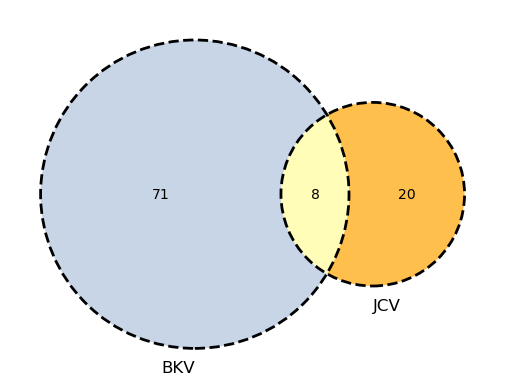

In [5]:
import pandas as pd
from fuzzywuzzy import process
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from matplotlib_venn import venn2_circles

# Read the excel file
df = pd.read_excel('CD8 T cell epitopes shared between BKV and JCV.xlsx')

# List of epitope sequences from Virus 1 (BKV)
v1_list = df.iloc[:, 0].dropna().astype(str).tolist()  # Filter out NaN values

# List of epitope sequences from Virus 2 (JCV) and filter out NaN values
v2_list = df.iloc[:, 1].dropna().astype(str).tolist()

# Find common epitopes efficiently using fuzzy matching
common_list = []
for epitope in v1_list:
    match = process.extractOne(epitope, v2_list, scorer=fuzz.ratio)
    if match and match[1] > 95:  # Matching ratio threshold
        common_list.append(epitope)

# Remove duplicates from the common list
common_list = list(set(common_list))

# Calculate the unique epitopes in each virus
v1_unique = len(v1_list) - len(common_list)
v2_unique = len(v2_list) - len(common_list)
common_count = len(common_list)

# Create a Venn diagram
venn2(subsets=(v1_unique, v2_unique, common_count),
      set_labels=('BKV', 'JCV'), set_colors=('lightsteelblue', 'orange'), alpha=0.7)
venn2_circles(subsets=(v1_unique, v2_unique, common_count),
              linestyle='dashed', linewidth=2, color='k')

# Show the plot
plt.show()

In [6]:
# Display the common epitopes (sequences)
print("Common Epitopes:")
for epitope in common_list:
    print(epitope)

Common Epitopes:
MELMDLLGL 
SQHSTPPKK
NREESMELMDL                    
ARIPLPNL
ILQSGMTLL
LLLIWFRPV
VKNPYPISF
TPHRHRVSA
